Connected to Python 3.11.0

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7177 - loss: 0.6093 - val_accuracy: 0.7164 - val_loss: 0.5761
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7587 - loss: 0.5498 - val_accuracy: 0.7351 - val_loss: 0.5523
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7696 - loss: 0.5313 - val_accuracy: 0.7910 - val_loss: 0.5285
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7882 - loss: 0.5301 - val_accuracy: 0.7948 - val_loss: 0.5094
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8026 - loss: 0.4888 - val_accuracy: 0.7985 - val_loss: 0.4909
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.4684 - val_accuracy: 0.8060 - val_loss: 0.4788
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.4775 - val_accuracy: 0.8060 - val_loss: 0.4683
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7700 - loss: 0.5048 - val_accuracy: 0.8097 - val_loss:

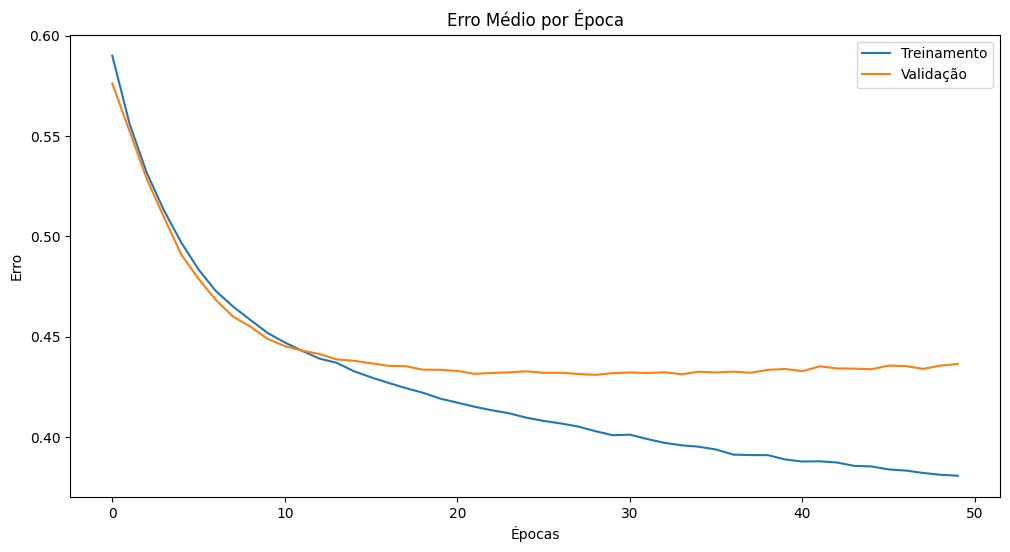

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from sklearn.metrics import confusion_matrix, classification_report


# Carregar os dados
data = pd.read_csv("train.csv")

# Pré-processamento
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Fare'] = data['Fare'].fillna(data['Fare'].median())


# Selecionar features e alvo
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

X = data[features]
y = data[target]

# Transformar dados categóricos
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['Age', 'Fare', 'SibSp', 'Parch']),
    ('cat', OneHotEncoder(), ['Pclass', 'Sex', 'Embarked'])
])

X = preprocessor.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo MLP
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Use Input para especificar o formato
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Saída binária
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Curvas de erro
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Erro Médio por Época')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.show()